# Linear Bivariate Bayesian Model Mixing with learning of mixture weights and calibration of coleman toy models.


The models can be found in Coleman Thesis : https://go.exlibris.link/3fVZCfhl

This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

Author : Dan Liyanage 

Date : 11/13/2022

## Steps for linear BMM
    1. Get Models with a prediction method
    2. Choose a Mixing method 
    3. Estimate the mixture weights (parameters in the mixture function) with user defined calibration method
To execute each step in this notebook we need to import the following from Taweret.

In [1]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed
sys.path.append("/Users/dananjayaliyanage/git/Taweret")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np

In [2]:
# Import models with a predict method
from Taweret.models import coleman_models as toy_models

m1 = toy_models.coleman_model_1()
m2 = toy_models.coleman_model_2()
truth = toy_models.coleman_truth()

In [3]:
g = np.linspace(-1,9,10)
plot_g = np.linspace(-1,9,100)
true_output = truth.evaluate(plot_g)
exp_data = truth.evaluate(g)

# 1. The models and the experimental data.

Truth
 
$f(x) = 2-0.1(x-4)^2$, where $x \in [-1, 9]$

Model 1

$f_1(x,\theta)= 0.5(x+\theta)-2$    , where $\theta \in [1, 6]$

Model 2

$f_2(x,\theta)= -0.5(x-\theta) + 3.7$   , where $\theta \in [-2, 3]$

Experimental data 

sampled from the Truth with a fixed standard deviation of 0.3




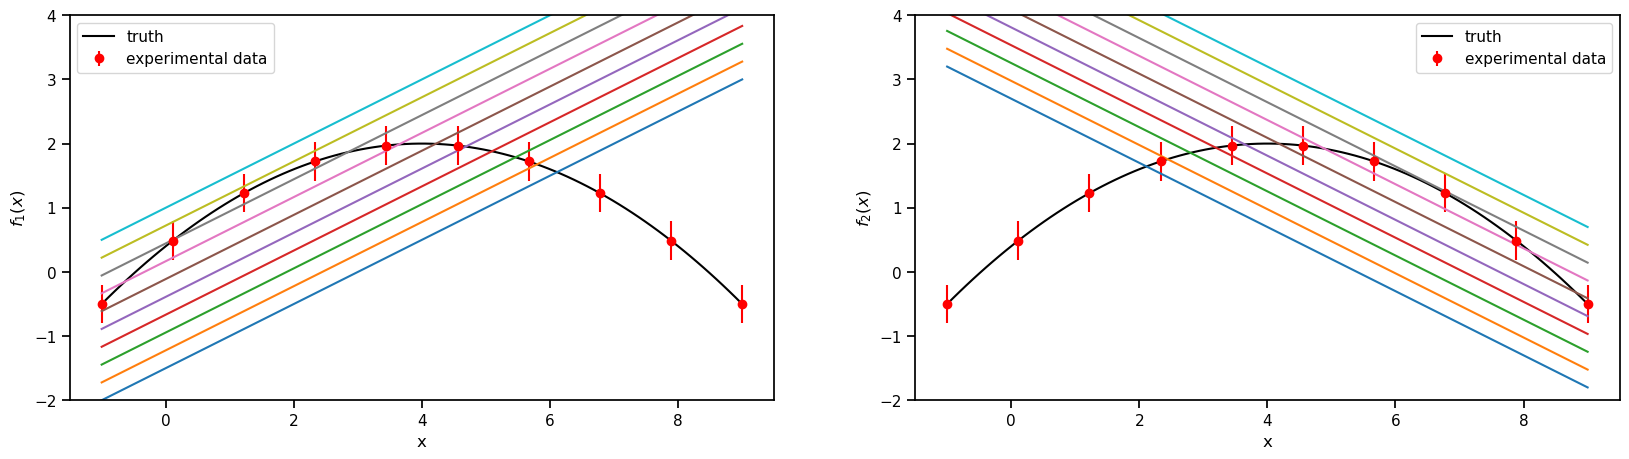

In [4]:
sns.set_context('notebook')
fig, axs = plt.subplots(1,2,figsize=(20,5))
prior_ranges = [(1,6), (-2,3)]
for i in range(0,2):
    ax = axs.flatten()[i]
    ax.plot(plot_g, true_output[0], label='truth', color='black')
    ax.errorbar(g,exp_data[0],exp_data[1], fmt='o', label='experimental data', color='r')
    ax.legend()
    ax.set_ylim(-2,4)
    for value in np.linspace(*prior_ranges[i],10):
        if i==0:
            predict_1 = m1.evaluate(plot_g, value)
            ax.plot(plot_g, predict_1[0])
            ax.set_ylabel(r'$f_1(x)$')
        if i==1:
            predict_2 = m2.evaluate(plot_g, value)
            ax.plot(plot_g, predict_2[0])      
            ax.set_ylabel(r'$f_2(x)$')    
    ax.set_xlabel('x') 
    


###  2. Choose a Mixing method

In [5]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'model1':m1,'model2':m2}
mix_model = BL(models_dic=models, method='cdf', nargs_model_dic={'model1':1, 'model2':1})

cdf mixing function has 2 free parameter(s)
To change the prior use `set_prior` method
Using default priors for model 1
{'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None)}
Using default priors for model 2
{'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}


In [6]:
## uncoment to change the prior from the default
import bilby 

priors = bilby.core.prior.PriorDict()
priors['cdf_0'] = bilby.core.prior.Normal(0, 1, name="cdf_0")
priors['cdf_1'] = bilby.core.prior.Normal(0, 1, name="cdf_1")
mix_model.set_prior(priors)

{'cdf_0': Normal(mu=0, sigma=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Normal(mu=0, sigma=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None),
 'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None),
 'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}

In [7]:
mix_model.prior

{'cdf_0': Normal(mu=0, sigma=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Normal(mu=0, sigma=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None),
 'model1_0': Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None),
 'model2_0': Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)}

### 3. Train to find posterior

In [8]:
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], label='cdf_mix', outdir='coleman')

13:19 bilby INFO    : Running for label 'cdf_mix', output will be saved to 'coleman'
13:19 bilby INFO    : Search parameters:
13:19 bilby INFO    :   cdf_0 = Normal(mu=0, sigma=1, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None)
13:19 bilby INFO    :   cdf_1 = Normal(mu=0, sigma=1, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)
13:19 bilby INFO    :   model1_0 = Uniform(minimum=1, maximum=6, name='model1_0', latex_label='model1_0', unit=None, boundary=None)
13:19 bilby INFO    :   model2_0 = Uniform(minimum=-2, maximum=3, name='model2_0', latex_label='model2_0', unit=None, boundary=None)
13:19 bilby INFO    : Single likelihood evaluation took 2.927e-04 s
13:19 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
13:19 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, auto

The following Default settings for sampler will be used. You can changethese arguments by providing kwargs_for_sampler argement in `train`.Check Bilby documentation for other sampling options.
{'sampler': 'ptemcee', 'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'burn_in_fixed_discard': 200, 'nsamples': 5000, 'threads': 6}


13:19 bilby INFO    : Generating pos0 samples
13:19 bilby INFO    : Starting to sample


1|0:00:00|nc:5.0e+02|a0:0.20-0.80|swp:0.26-0.70|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.24ms/ev
2|0:00:00|nc:1.0e+03|a0:0.30-0.80|swp:0.16-0.64|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.27ms/ev
3|0:00:00|nc:1.5e+03|a0:0.33-0.67|swp:0.13-0.61|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
4|0:00:00|nc:2.0e+03|a0:0.40-0.65|swp:0.12-0.62|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.17ms/ev
5|0:00:00|nc:2.5e+03|a0:0.44-0.68|swp:0.13-0.64|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
6|0:00:00|nc:3.0e+03|a0:0.40-0.70|swp:0.15-0.64|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
7|0:00:00|nc:3.5e+03|a0:0.43-0.71|swp:0.15-0.62|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
8|0:00:00|nc:4.0e+03|a0:0.42-0.75|swp:0.16-0.63|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.12ms/ev
9|0:00:00|nc:4.5e+03|a0:0.42-0.71|swp:0.17-0.62|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
10|0:00:00|nc:5.0e+03|a0:0.46-0.74|swp:0.17-0.62|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.11ms/ev
11|0:00:00|nc:5.5e+03|a0:0.45-0.76|swp:0.17-0.61|n:nan<5000|t!nan(+nan,+nan)|q:

13:21 bilby INFO    : Finished sampling
13:21 bilby INFO    : Writing checkpoint and diagnostics
13:21 bilby INFO    : Finished writing checkpoint
13:21 bilby INFO    : Sampling time: 0:01:48.098539
13:21 bilby INFO    : Summary of results:
nsamples: 5020
ln_noise_evidence:    nan
ln_evidence: -9.553 +/-  3.105
ln_bayes_factor:    nan +/-  3.105



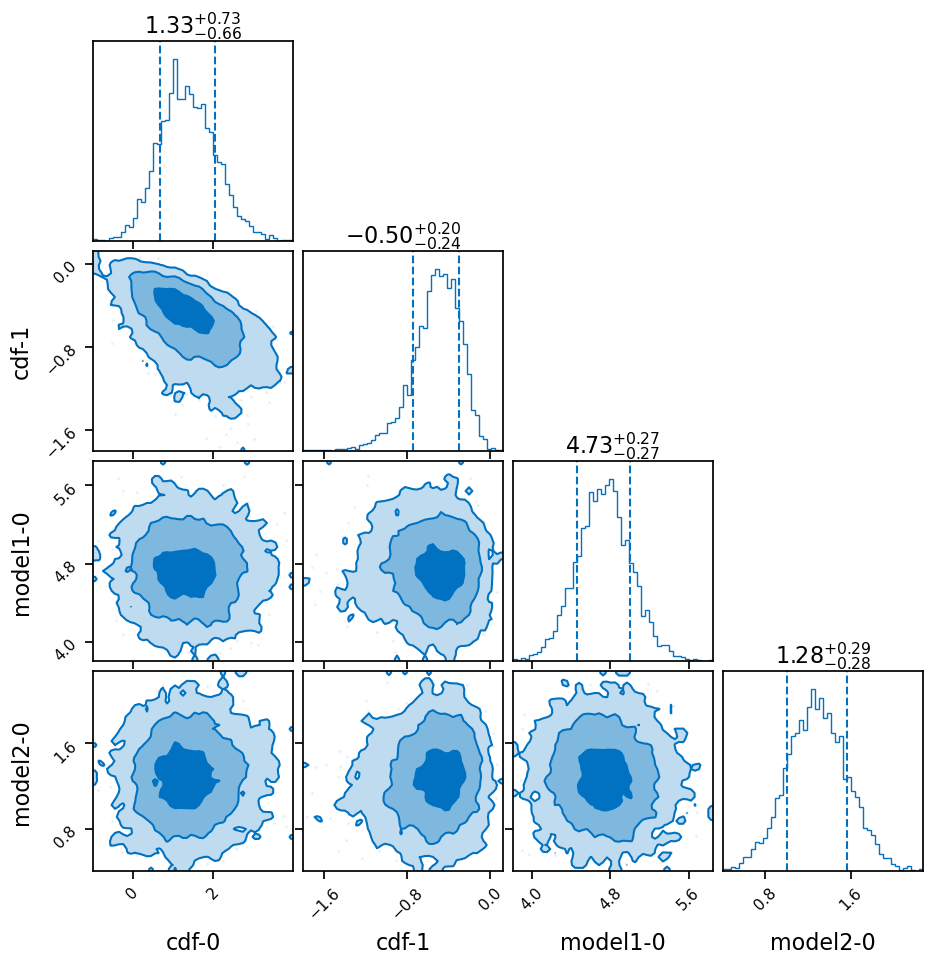

In [9]:
result.plot_corner()

### 4. Predictions

In [10]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])

(10000, 4)
using provided samples instead of posterior


In [11]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [12]:
mix_model.map

array([ 3.51178461, -0.97946035,  4.78734012,  1.27815108])

In [13]:
# Map value prediction for the step mixing function parameter
model_params = [np.array(mix_model.map[2]), np.array(mix_model.map[3])]
map_prediction = mix_model.evaluate(mix_model.map[0:2], plot_g, model_params=model_params)

In [14]:
_,_,CI_weights,_=mix_model.predict_weights(plot_g, CI=[5,20, 80, 95])
perw_5, perw_20, perw_80, perw_95 = CI_weights

(5020, 100)


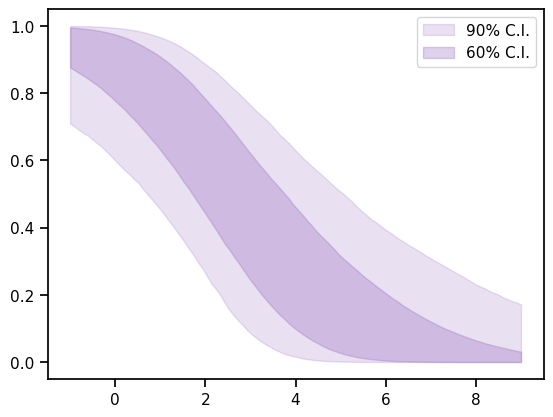

In [15]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill_between(plot_g,perw_5,perw_95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,perw_20,perw_80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.legend()
#ax.plot(plot_g, true_output[0], label='truth')
#ax.set_ylim(1.2,3.2)

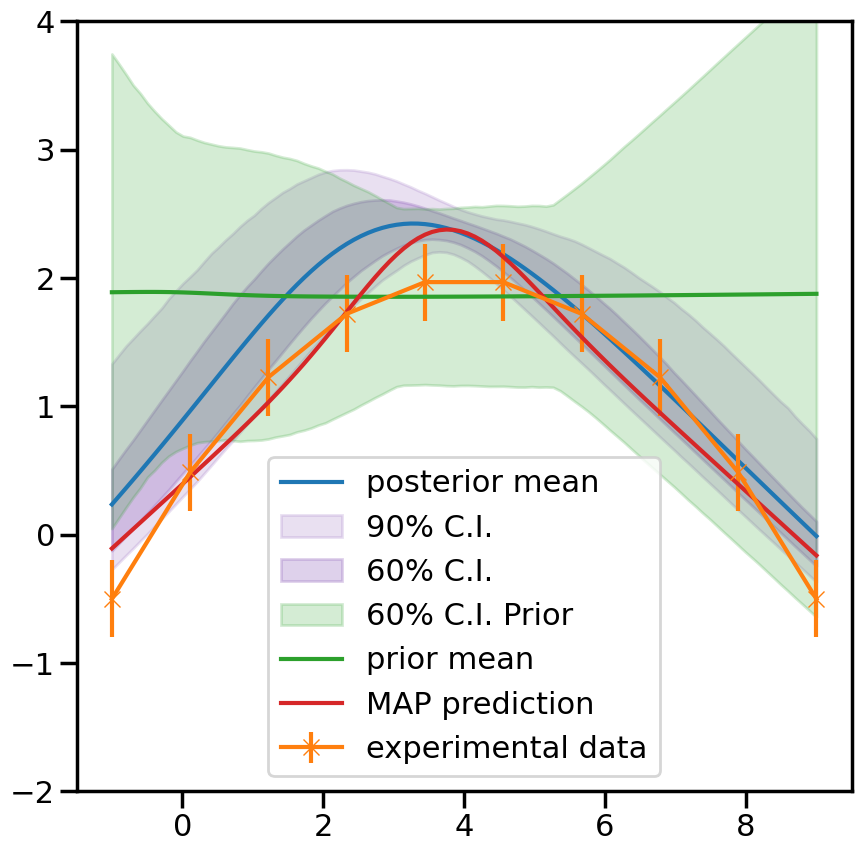

In [16]:
%matplotlib inline
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(plot_g, mean, label='posterior mean')
ax.fill_between(plot_g,per5,per95,color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20,per80, color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.fill_between(plot_g,prior20,prior80,color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
ax.errorbar(g,exp_data[0],yerr=exp_data[1], marker='x', label='experimental data')
ax.plot(plot_g, mean_prior, label='prior mean')
ax.plot(plot_g, map_prediction.flatten(), label='MAP prediction')
ax.set_ybound(-2,4)
ax.legend()